In [17]:
import os
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('BUNDESBANK-BBK01_WT5511.csv', index_col=0)

df.head()
idx = pd.to_datetime(df.index).to_period('M')
df.index=idx
y = df['Value']

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

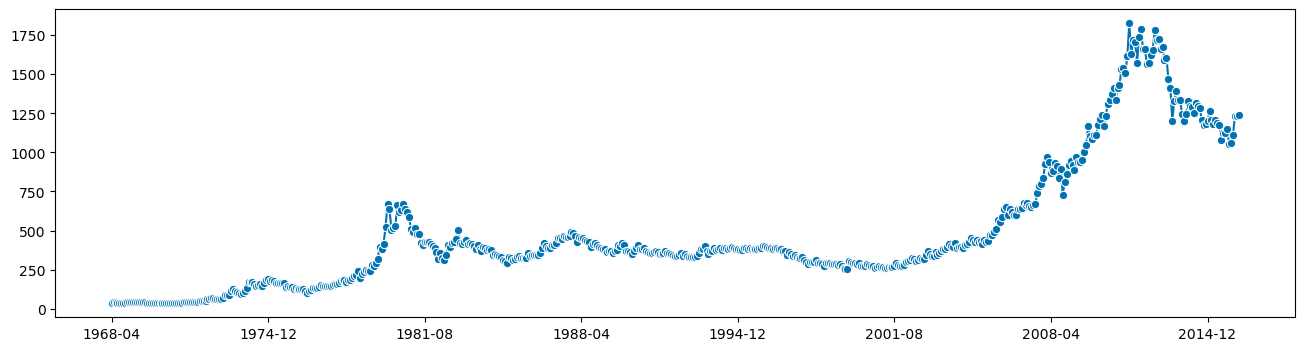

In [19]:
plot_series(df)

In [20]:
y_train, y_test = temporal_train_test_split(y,test_size=12)
print(y_train.shape, y_test.shape)

(565,) (12,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

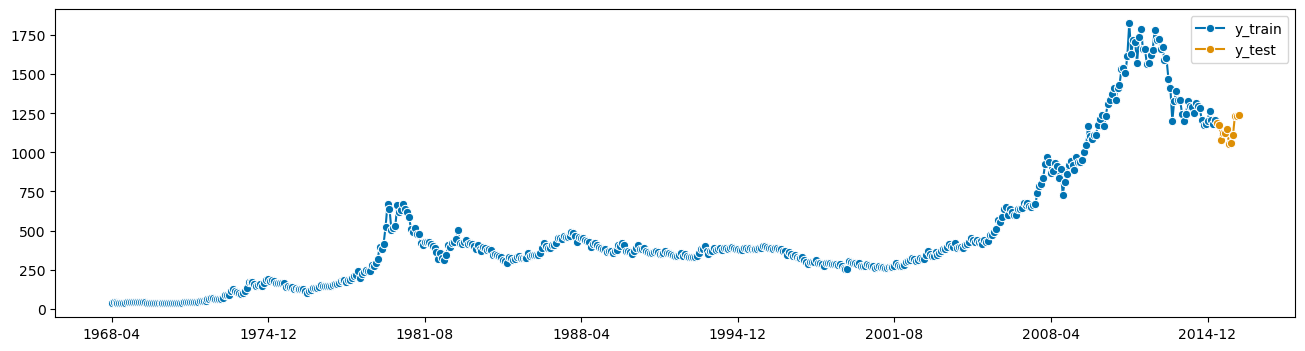

In [21]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

Specifying a forecasting horizon

In [22]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
             '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04'],
            dtype='period[M]', is_relative=False)

Exponential Smoothing

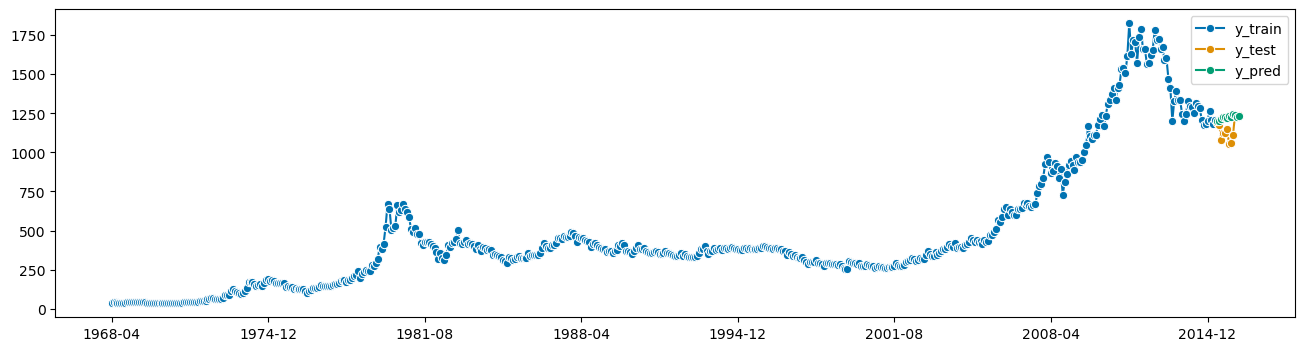

In [23]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

AutoETS

In [24]:
forecaster = AutoETS(auto=True, sp=1)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  565
Model:                       ETS(MAN)   Log Likelihood               -2462.997
Date:                Thu, 16 Nov 2023   AIC                           4935.993
Time:                        18:41:12   BIC                           4957.677
Sample:                    04-30-1968   HQIC                          4944.457
                         - 04-30-2015   Scale                            0.003
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.045     22.333      0.000       0.912       1.088
smoothing_trend     0.0496      0.020      2.522      0.012       0.011       0.088
initial_level      38.8014      

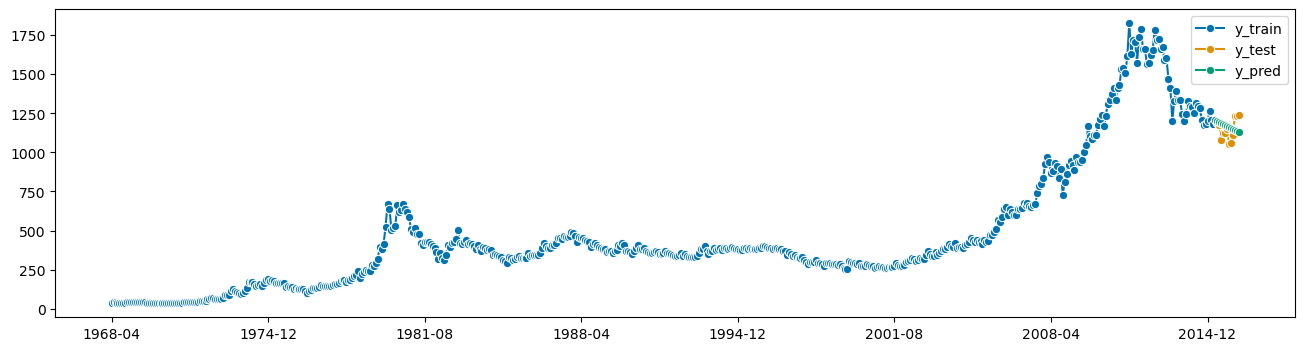

In [25]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [26]:
mean_squared_error(y_test, y_pred,square_root=True)

75.10745840447639